# Example - Clip

In [1]:
import rioxarray

%matplotlib inline

## Load in xarray dataset

See docs for [rioxarray.open_rasterio](../rioxarray.rst#rioxarray-open-rasterio)
  
Notes:

 - `chunks=True` only works if you have a dask installed. Otherwise, you can skip this.
 - `masked=True` will convert from integer to `float64` and fill with `NaN`. If this behavior is not desired, you can skip this.

In [2]:
xds = rioxarray.open_rasterio(
    "../../test/test_data/compare/small_dem_3m_merged.tif",
    masked=True,
    chunks=True,
)

In [3]:
xds

<xarray.DataArray (band: 1, y: 245, x: 574)>
dask.array<shape=(1, 245, 574), dtype=float64, chunksize=(1, 245, 574)>
Coordinates:
  * band         (band) int64 1
  * y            (y) float64 4.616e+06 4.616e+06 ... 4.615e+06 4.615e+06
  * x            (x) float64 4.25e+05 4.251e+05 ... 4.268e+05 4.268e+05
    spatial_ref  int64 0
Attributes:
    transform:     (3.0, 0.0, 425047.68381405267, 0.0, -3.0, 4615780.040546387)
    scales:        (1.0,)
    offsets:       (0.0,)
    grid_mapping:  spatial_ref

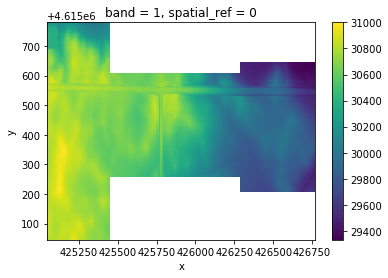

In [4]:
xds.plot()

## Clip using a geometry

API Reference for `rio.clip`:

  - [DataArray.clip](../rioxarray.rst#rioxarray.rioxarray.RasterArray.clip)
  - [Dataset.clip](../rioxarray.rst#rioxarray.rioxarray.RasterDataset.clip)

In [5]:
geometries = [
    {
        'type': 'Polygon',
        'coordinates': [[
            [425499.18381405267, 4615331.540546387],
            [425499.18381405267, 4615478.540546387],
            [425526.18381405267, 4615478.540546387],
            [425526.18381405267, 4615331.540546387],
            [425499.18381405267, 4615331.540546387]
        ]]
    }
]

In [6]:
clipped = xds.rio.clip(geometries, xds.rio.crs)

In [7]:
clipped

<xarray.DataArray (band: 1, y: 49, x: 9)>
dask.array<shape=(1, 49, 9), dtype=float64, chunksize=(1, 49, 9)>
Coordinates:
  * band         (band) int64 1
  * y            (y) float64 4.615e+06 4.615e+06 ... 4.615e+06 4.615e+06
  * x            (x) float64 4.255e+05 4.255e+05 ... 4.255e+05 4.255e+05
    spatial_ref  int64 0
Attributes:
    transform:     (3.0, 0.0, 425500.68381405267, 0.0, -3.0, 4615477.04054638...
    scales:        (1.0,)
    offsets:       (0.0,)
    grid_mapping:  spatial_ref

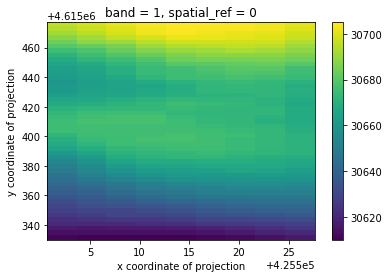

In [8]:
clipped.plot()

In [9]:
clipped.rio.to_raster("clipped.tif", compress='LZMA', tiled=True, dtype="int32")

## Clip using a GeoDataFrame

API Reference for `rio.clip`:

  - [DataArray.clip](../rioxarray.rst#rioxarray.rioxarray.RasterArray.clip)
  - [Dataset.clip](../rioxarray.rst#rioxarray.rioxarray.RasterDataset.clip)

In [10]:
import geopandas
from shapely.geometry import box, mapping

In [11]:
geodf = geopandas.GeoDataFrame(
    geometry=[
        box(425499.18381405267, 4615331.540546387, 425526.18381405267, 4615478.540546387)
    ],
    crs=xds.rio.crs.to_dict()
)

In [12]:
clipped = xds.rio.clip(geodf.geometry.apply(mapping), geodf.crs, drop=False, invert=True)

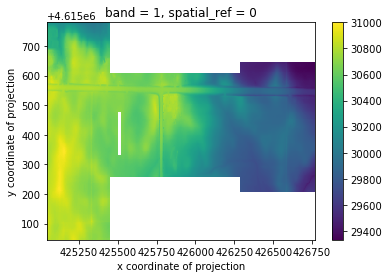

In [13]:
clipped.plot()

In [14]:
clipped.rio.to_raster("clipped_invert.tif", compress='LZMA', tiled=True, dtype="int32")